## <font color='#1D76BA'>Integrated CA1 - Sem 2 MSc in Data Analytics<font color='#00A859'>
### <font color='#'>**Advanced Data Analytics  & Big Data Storage and Processing**
### <font color='#1ABC9C'>**Lecturer(s): David McQuaid and Muhammad Iqbal**
------
<font color='#E74C3C'>**Students Name / ID** // Rosilene Francisca da Silva - 2021090

## Business Understanding


### "Using Neural Networks and Big Data Analytics to Predict E-commerce Revenue Generation: A Look at Visitor Type Dynamics"

Research Questions:

** What are the key features that influence e-commerce revenue generation for different visitor types, and how can neural networks combined with big data processing reveal these factors?

(This question seeks to identify and analyse the features that have a significant impact on revenue generation, with a focus on how they differ between visitor types and how neural networks can detect these patterns.)

 

** What are the limitations and challenges of using neural networks to analyse big data in e-commerce, and how can they be overcome?

(This investigates the practical challenges of deploying neural networks in a big data environment, particularly in the e-commerce sector, and proposes solutions to these challenges.)

## Data Understanding and Preparation

#### Dataset: Online Shoppers Purchasing Intention Dataset
Donated on 8/30/2018

The dataset was researched on the The UCI Machine Learning Repository website: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset that CSV file was downloaded onto Python.

Dataset Information
Additional Information

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 

Creators
C. Sakar
Yomi Kastro - DOI: 10.24432/C5F88Q

#### License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

Reference: 'Sakar,C. and Kastro,Yomi. (2018). Online Shoppers Purchasing Intention Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.'

### Importing the required libraries and Loading the dataset

In [1]:
#pip install --upgrade matplotlib

In [1]:
#Importing the essential libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm

%matplotlib inline

#Warnings: It can handle alert and warning messages with a number of commands and functions.
import warnings
warnings.filterwarnings('ignore')

/home/hduser/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Command to display all columns in the file.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Load the Dataset, first using Pandas
shopperintents_df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
shopperintents_df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [118]:
shopperintents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

There are eight categorical and ten numerical attributes in the dataset. The class label can be set to the 'Revenue' attribute.

In [5]:
shopperintents_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
shopperintents_df.shape

(12330, 18)

### Data Cleaning and Preprocessing

#### Check for missing values

In [7]:
onlinenull = shopperintents_df.isna().sum().sum()
print ('Null values in shopperintents: {}'.format(onlinenull))

Null values in shopperintents: 0


#### Statistics:

Gain an understanding of the data's central tendencies and dispersion.

#### Summary statistics for numerical columns

In [8]:
shopperintents_df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

The dataset includes 12,330 sessions, which provides a solid foundation for statistical inference regarding online shopping behaviour.
The data fields address many aspects of user contact, including administrative, informative, and product-related activities, as well as their length. In addition, engagement metrics like as bounce and exit rates, as well as page values, are included, providing a comprehensive picture of user involvement.

Administrative and informational engagement:

Administrative Actions: A mean of roughly 2.32 with a standard deviation of 3.32 indicates low to moderate engagement in administrative duties, with broad variation between sessions. The maximum score suggests that some sessions include a high level of administrative interaction.
Informational Actions: The average value is close to 0.5, and the high standard deviation relative to the mean suggests that, while most sessions have no informational activities, a few have much more, indicating a range of user intent.

Product Related Engagement:

Product-related pages have higher user engagement (mean 31.73). However, the high standard deviation (44.48) and maximum value (705) indicate significant variability in user interactions.
The average product-related length is fairly long (1194.74 seconds), with a wide range in the data, indicating sessions in which consumers spend a large amount of time, possibly indicating focused purchasing intent.

Engagement metrics:
Bounce Rates: The low average bounce rate of 0.022 suggests that most sessions involve several page interactions, which is a good sign of user involvement.
Exit Rates: Although somewhat higher on average (0.043) than bounce rates, the exit rate variance is modest, indicating a consistent pattern of user exit behaviour across sessions.

Value metrics:
Page Values: With a mean of 5.89 and a huge standard deviation, page value (income production) fluctuates greatly, demonstrating that while many pages do not directly contribute to revenue, a few are extremely effective.

Technical and temporal features:

SpecialDay: The data primarily covers non-special days, as evidenced by the low mean and the 75th percentile remaining at zero.
The selection of operating systems and browsers utilised reflects the user base's technological variety.

Inferential insights:

A considerable majority of sessions have no informational or administrative actions, as seen by the 50th percentile (median) values being zero. This could indicate that a substantial portion of users are primarily interested in product discovery or purchase.
The range in lengths reflects varying levels of user engagement, which may be influenced by factors such as user purpose, website usability, and product diversity.
Outliers in many metrics, particularly durations and page values, require more analysis to uncover high-value user segments or sessions that depart from regular interaction patterns.

Limitations and considerations:

Summary data do not disclose the causality or predictive potential of these variables in terms of income production, necessitating the use of more advanced analytical models.

#### Summary statistics for categorical columns

In [9]:
print(shopperintents_df.describe(include='object'))

        Month        VisitorType
count   12330              12330
unique     10                  3
top       May  Returning_Visitor
freq     3364              10551


###  Exploratory Data Analysis (EDA) 
EDA entails comprehending and visualising the dataset in order to uncover patterns and insights.

####  Visualise the distribution of numerical features to better understand their shape, spread, and the presence of outliers.

### Single-variable analysis

For numerical and categorical variables:

#### Numeric Features

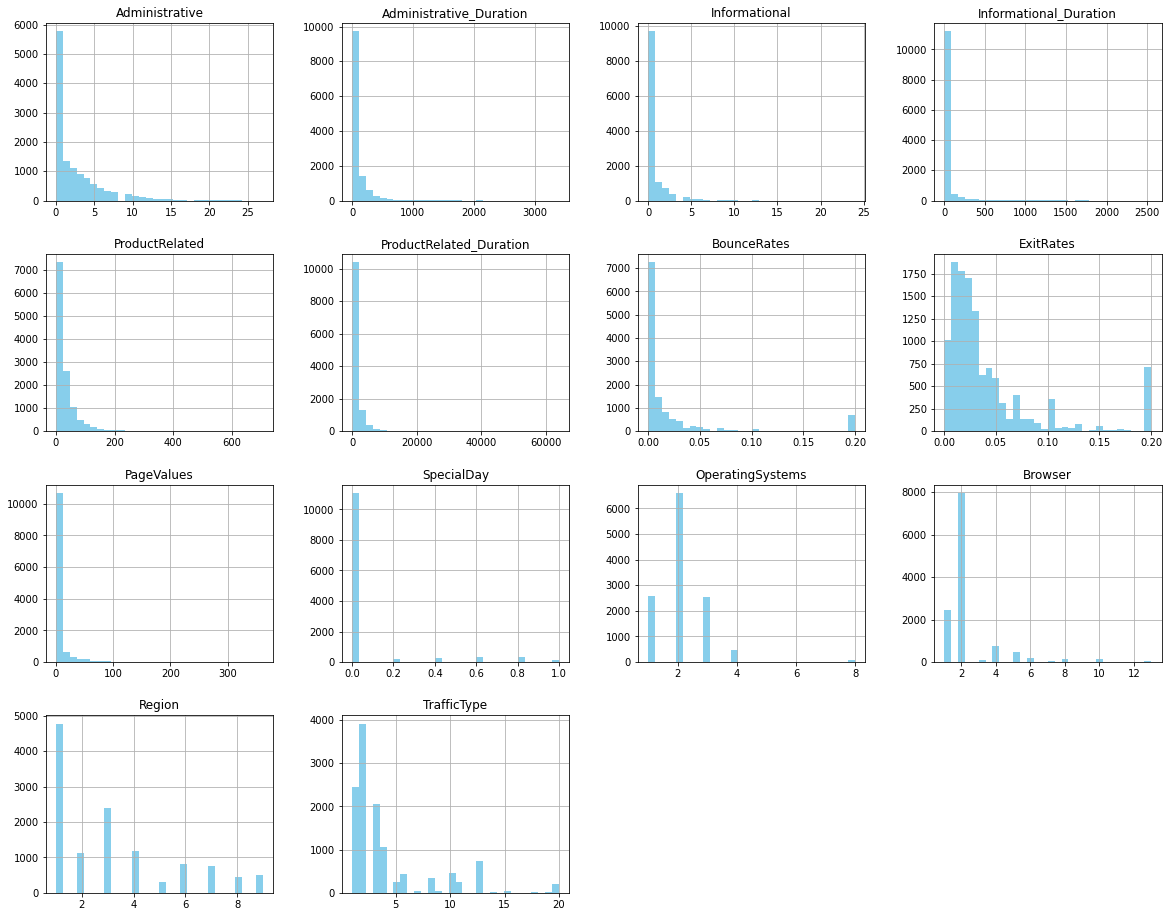

In [10]:
shopperintents_df.hist(bins=30, color = "skyblue", figsize=(20,16))
plt.show()

Some insights from histograms:
- Skewness: The majority of the features appear to have a right-skewed distribution, which means there are more occurrences near the bottom of the scale and fewer as the value rises. This is typical of count data and time spent, with many sessions having modest counts or durations and only a few having extremely high values.
- Bimodal/Multimodal Distributions: If a histogram contains several peaks, it indicates that the data may be divided into various categories. For example, two peaks could suggest two distinct types of visitor behaviours.
- Outliers: Long tails extending to the right in several distributions indicate the presence of outliers. These could be due to unusually high readings that require more research to verify whether they are genuine or the result of data entering errors.
- Common Values: Histograms with spikes at the beginning may imply a high number of zeros or low values in certain features. For example, many viewers may not engage with 'Informational' material or simply view a few pages, resulting in a spike at the lower end of the histogram.
- Potential for Feature Engineering: The variation in these traits may be useful for predictive modelling. For example, features with a larger range of values may have more discriminative power than those with a tight spread.
- Need for Data Transformation: Because of the skewness, adding a transformation such as log or square root could normalise these features and potentially improve the performance of specific algorithms.
- Sparsity of Data: For some aspects, the concentration of values at the lower end of the scale may indicate that the data is sparse, influencing how models interpret the importance of these features.

Given the skewness of multiple features, suitable data transformations or non-parametric statistical approaches may be required for further research.

#### Categorical Features

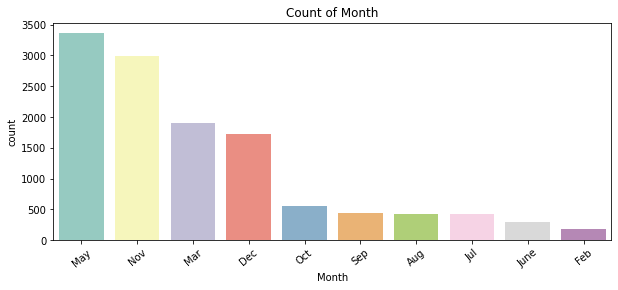

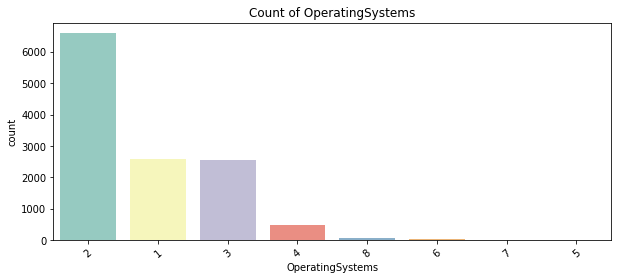

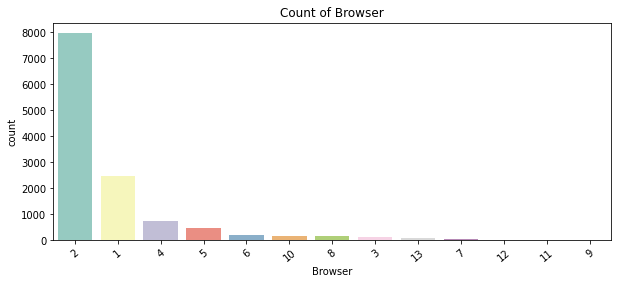

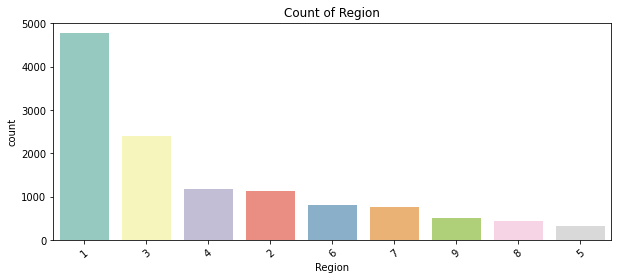

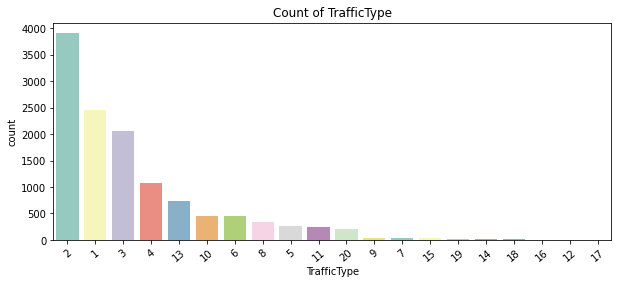

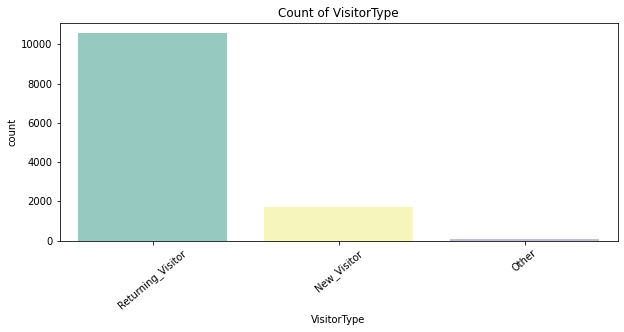

In [11]:
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=shopperintents_df[feature], order = shopperintents_df[feature].value_counts().index, 
                 palette='Set3')
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=40)
    plt.show()

The histogram shows a significant concentration of values at the lower end, indicating a strongly right-skewed distribution. 

### Bivariate Analysis.

#### Relationship Between Features and Target Variable
Investigate how various features relate to the target variable `Revenue`.

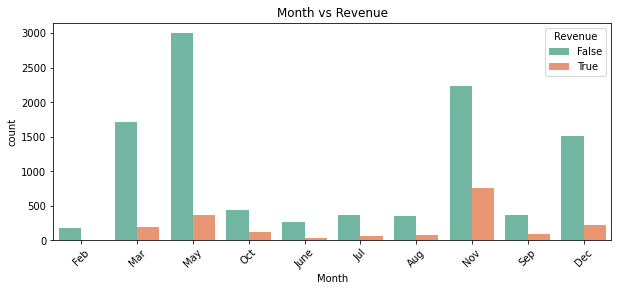

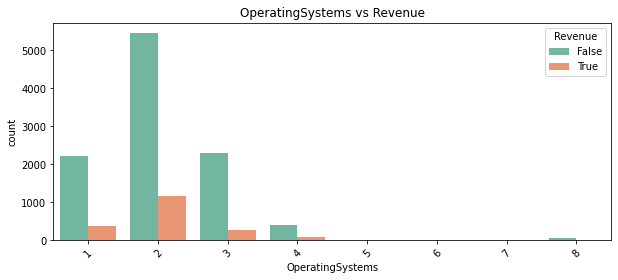

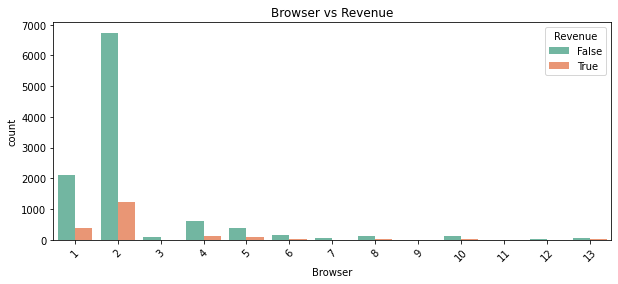

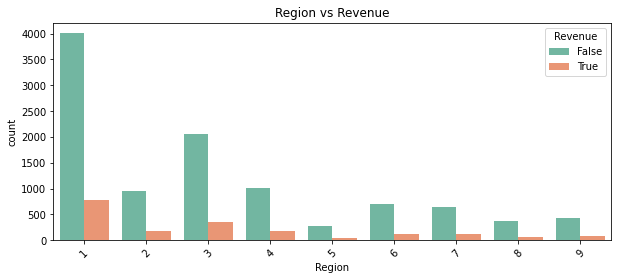

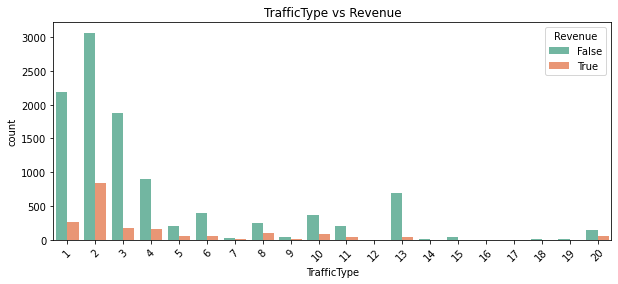

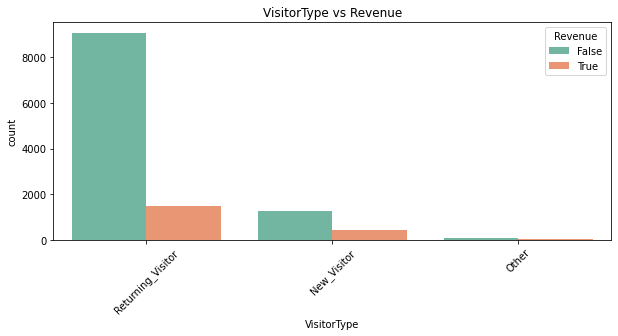

In [13]:
# Categorical features vs. Revenue
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, palette = 'Set2', hue='Revenue', data=shopperintents_df)
    plt.title(f'{feature} vs Revenue')
    plt.xticks(rotation=45)
    plt.show()

#### Numeric features vs. Revenue

In [15]:
#pip install --upgrade seaborn matplotlib pandas numpy

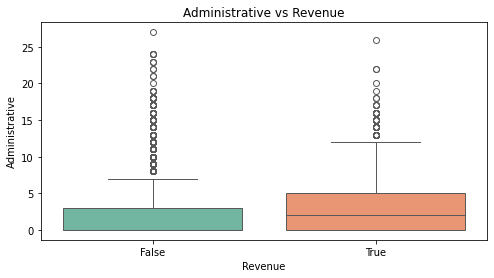

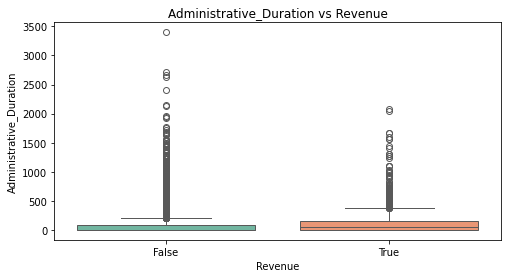

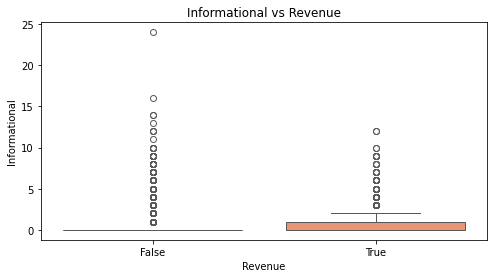

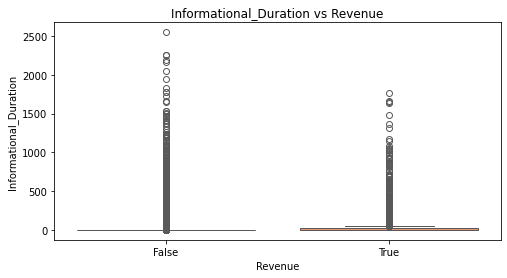

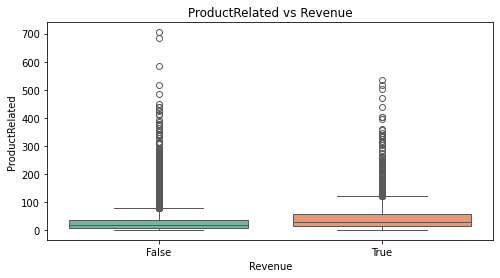

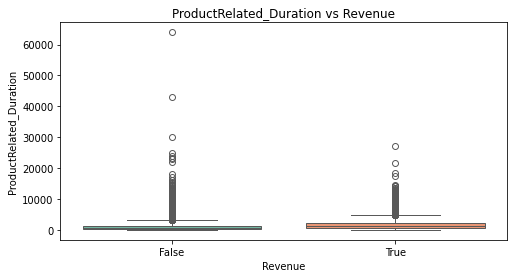

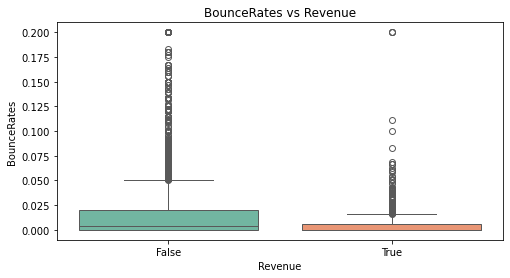

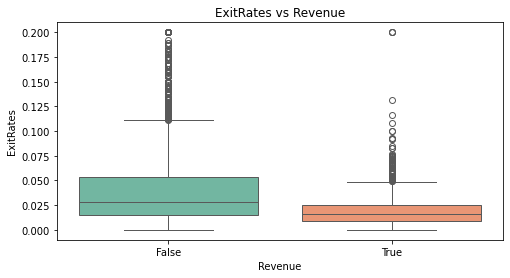

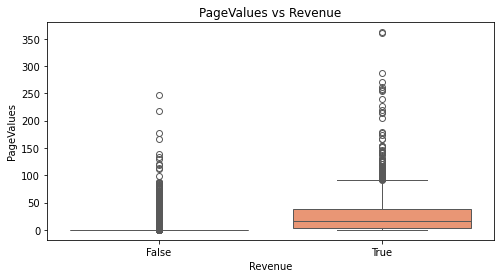

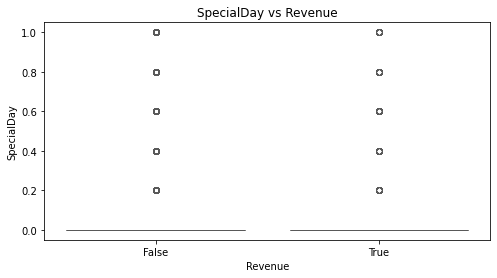

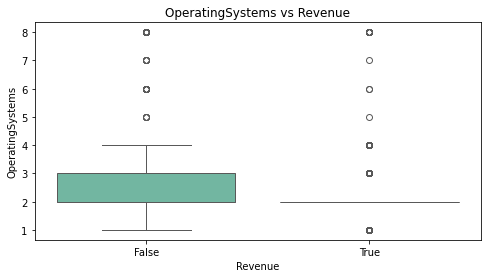

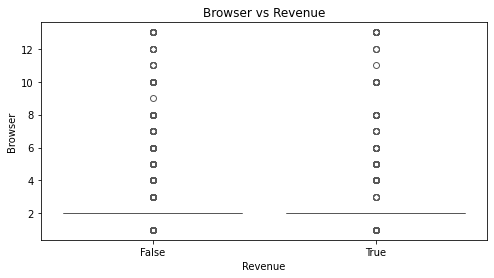

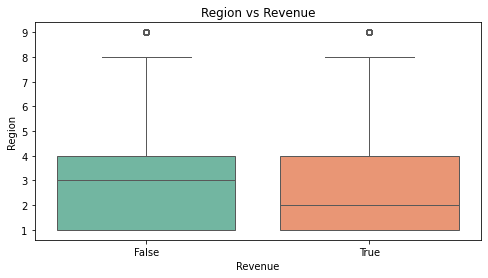

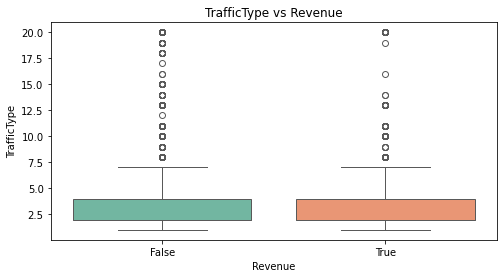

In [12]:
#Define 'numeric_features' as a list of names of numeric columns you want to analyze
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational', 
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
                    'OperatingSystems', 'Browser', 'Region', 'TrafficType']

for feature in numeric_features:
    # Create a temporary DataFrame with just the current feature and 'Revenue' converted to string for plotting purposes
    temp_df = shopperintents_df[[feature]].copy()
    temp_df['Revenue'] = shopperintents_df['Revenue'].astype(str)
    
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Revenue', y=feature, data=temp_df, palette='Set2')
    plt.title(f'{feature} vs Revenue')
    plt.show()

#### VisitorType Breakdown

In [13]:
# Check unique values in 'Revenue'
print(shopperintents_df['Revenue'].unique())

[False  True]


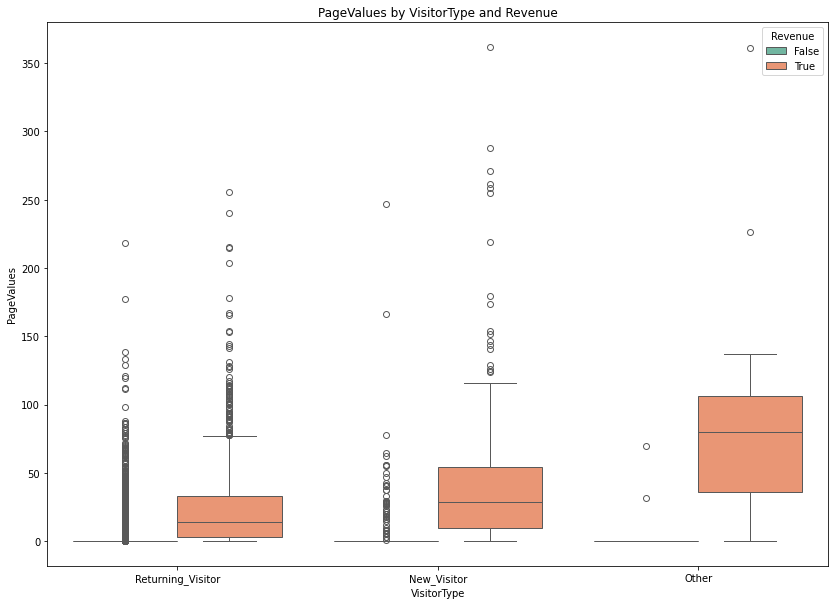

In [14]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='VisitorType', y='PageValues', palette = 'Set2', hue='Revenue', data=shopperintents_df)
plt.title('PageValues by VisitorType and Revenue')
plt.show()

#### Bar plot for visitor types against the target

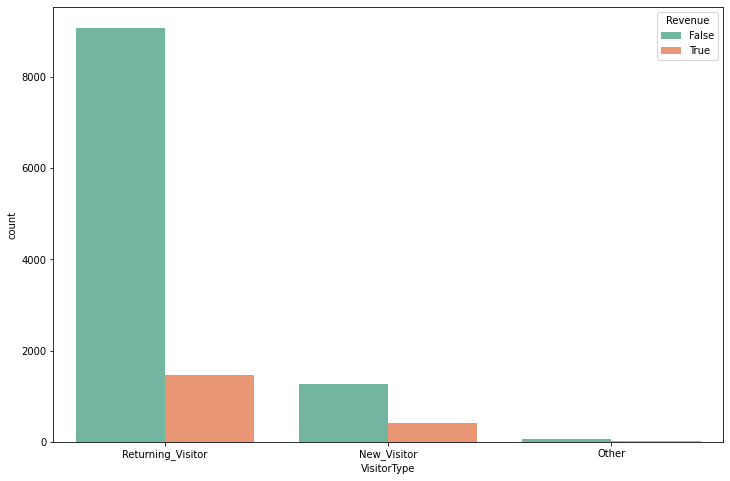

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(x='VisitorType', palette = 'Set2', hue='Revenue', data=shopperintents_df)
plt.show()

#### Visitor Type Distribution 

In [16]:
shopperintents_df ['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

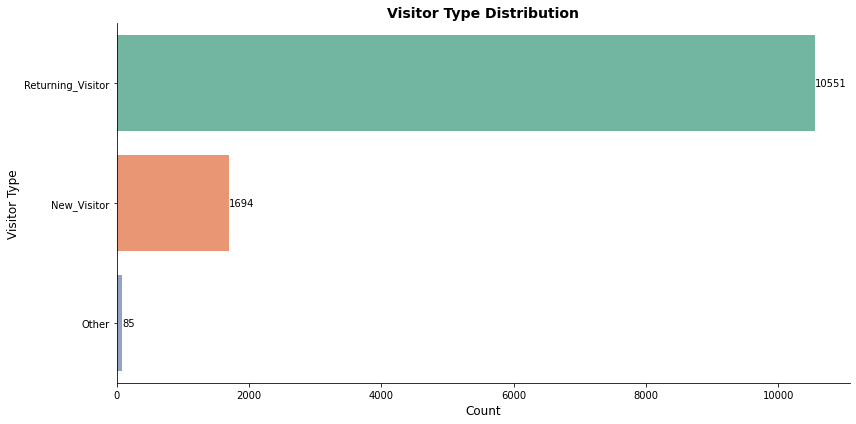

In [17]:
# Create a countplot with seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=shopperintents_df, y='VisitorType', order=shopperintents_df['VisitorType'].value_counts().index, 
              palette='Set2')
sns.despine()  # Remove the top and right spines

# Add annotations to each bar for clarity
for i, value in enumerate(shopperintents_df['VisitorType'].value_counts().values):
    plt.text(value, i, f'{value}', va='center')

# Title and labels
plt.title('Visitor Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Visitor Type', fontsize=12)
plt.tight_layout()
plt.show()

The bar chart shows the distribution of visitor types in an e-commerce dataset. It shows that the most popular category is 'Returning_Visitor', with a total of 10,551 instances, indicating a large number of users who return to the platform. In contrast, there are significantly fewer 'New_Visitors', totaling 1,694, reflecting the influx of first-time users to the website. The 'Other' category is small, with only 85 entries, implying that it is a residual category for visitors who do not fit into the standard classifications. The data visualisation reveals a significant difference in the number of returning and new visitors, emphasising the platform's visitor dynamics.

#### Check the distribution of the 'Revenue' attribute, which can be used as a class label

In [18]:
shopperintents_df ['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

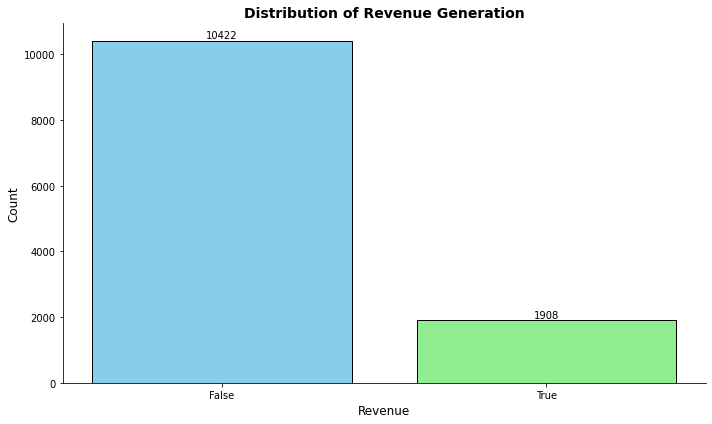

In [19]:
import matplotlib.pyplot as plt

# Calculate the counts for the Revenue True/False
revenue_counts = shopperintents_df['Revenue'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
bars = ax.bar(revenue_counts.index.astype(str), revenue_counts.values, color=['skyblue', 'lightgreen'], 
              edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(top=False, right=False)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
ax.set_title('Distribution of Revenue Generation', fontsize=14, fontweight='bold')
ax.set_xlabel('Revenue', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

The dataset is imbalanced. The graph clearly state that the dataset demonstrates a significant imbalance between the two classes. Note the exact count for each class (10,422 for 'False' and 1,908 for 'True', as indicated by the bars). 
It's represent approximately 84.53% of the instances are classified as 'False', indicating no revenue was generated and 15.47% of the instances are classified as 'True', meaning revenue was generated in these cases.

This imbalance is an important factor to consider when developing predictive models because it can affect model performance and necessitate the use of specific techniques to address data skewness. 

In [20]:
#pip install plotly

In [21]:
import plotly.express as px

# Define the color map to use specific colors for true and false values.
color_map = {"False": 'darkblue', 
             "True": 'lightgrey'}   

# Create the box plot
fig = px.box(shopperintents_df, x='VisitorType', y='ProductRelated_Duration', color='Revenue',
             color_discrete_map=color_map)
fig.update_traces(quartilemethod="inclusive")  # or "inclusive", or "linear" by default
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',  
    'paper_bgcolor': 'rgba(0,0,0,0)', 
    'showlegend': True,})

fig.update_xaxes(showgrid=False, zeroline=False)  
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', zeroline=False) 

# Remove axis ticks and labels if they do not add to the understanding of the plot
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(title='ProductRelated Duration by Visitor Type and Revenue',
                  xaxis_title='Visitor Type',
                  yaxis_title='Product Related Duration',
                  font=dict(family="Sans-serif", size=12, color="black"))
fig.show()

#### Correlation Matrix with Heatmap
Understand how numerical features relate to one another.

To analyze it without changing the whole DataFrame, let's concatenate these new DataFrames with the original one as needed:

In [22]:
# One-Hot Encoding for 'Month' and 'VisitorType'
correlation_df = pd.get_dummies(shopperintents_df, columns=['Month', 'VisitorType'])

Choosing the appropriate encoding method for the Month and VisitorType variables in this dataset is heavily influenced by the variables' nature and the context of the analysis or modelling objectives. The reasons why One-Hot Encoding was chosen are: 
For `VisitorType`feature, One-Hot Encoding is a superior option since it truly portrays the nature of the data by treating each visitor type as a separate category without enforcing any order. Also for `month' feature One-Hot Encoding can preserves nominal nature without indicating an ordinal relationship. However, it does not directly reflect the cyclical character of months.

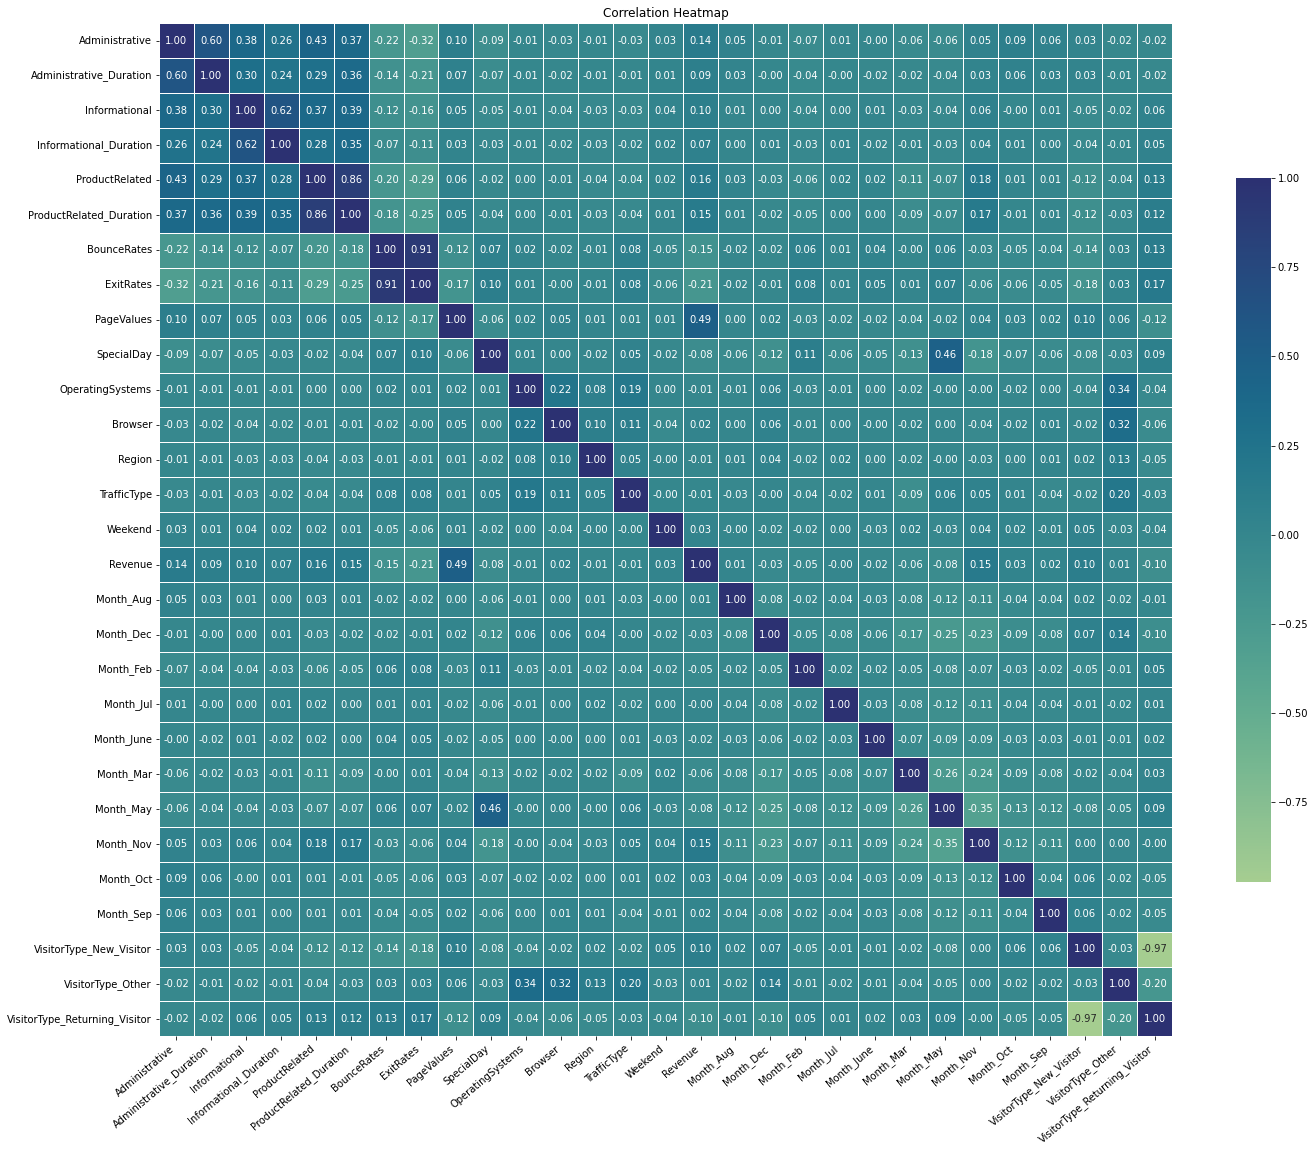

In [28]:
# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest',
            cbar_kws={"shrink": .5}, square=True, linewidths=.5)

plt.title('Correlation Heatmap')
plt.xticks(rotation=40, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()  
plt.show()

This heatmap visualises the correlation coefficients between the dataset's various attributes. It is useful to understand not just how various features relate to revenue, but also how they relate to one another.

- Key Correlation Analysis:
High Positive correlation: There is a moderate to high positive correlation between the Administrative, Informational, and Product-Related variables and their respective duration features (Administrative_Duration, Informational_Duration, and ProductRelated_Duration). This may suggest that users are more likely to contribute to the revenue if they interact with the material (on different kinds of pages) more.

The data indicates that there is a moderate negative association between Bounce Rates and ProductRelated and ProductRelated_Duration. This implies that visitors with lower bounce rates are likely to be more engaged with product-related content, which could result in revenue.

Revenue and Exit Rates: There is a strong negative correlation between Exit Rates and Revenue, which suggests that the possibility of making money declines as the rate at which users depart the website rises.

Page Values: Page values have a strong positive link with revenue, supporting the notion that more valuable pages contribute significantly to income production.

Month and Revenue: November has a significant positive link with revenue, which could be due to Christmas shopping in many locations, particularly through events such as Black Friday and Cyber Monday. Other months, such as May and March, also exhibit a positive link, but less prominent.

Visitor Type: VisitorType_New_Visitor is positively correlated with Revenue, while VisitorType_Returning_Visitor is slightly negatively correlated. This could imply that new visitors are more likely to make a purchase, or that marketing campaigns to attract new visitors are effective.

- Considerations for Further Analysis:

Collinearity: Certain features are closely connected with one another. For example, ProductRelated and ProductRelated_Duration exhibit a strong correlation, which is to be expected given that more product-related pages are likely to result in longer visits to the website. This collinearity should be considered while developing prediction models to minimise overfitting.

Heatmap Interpretation: The color-coded scale allows you to rapidly discover strong correlations; warmer colours (red) indicate positive correlations, while cooler colours (blue) suggest negative correlations.

Causation: As with other correlation analyses, it's crucial to note that correlation does not imply causation. Additional study, such as causal inference models, could help to clarify the direction of the associations observed here.

#### Calculate correlations. Specifically with the 'Revenue' feature and display it.
Plotting these connections in a bar chart, which shows how each feature interacts with revenue. This concentrated method emphasises the relationship between individual features and the target variable, making it easier to determine which features provide the best predictive signals.

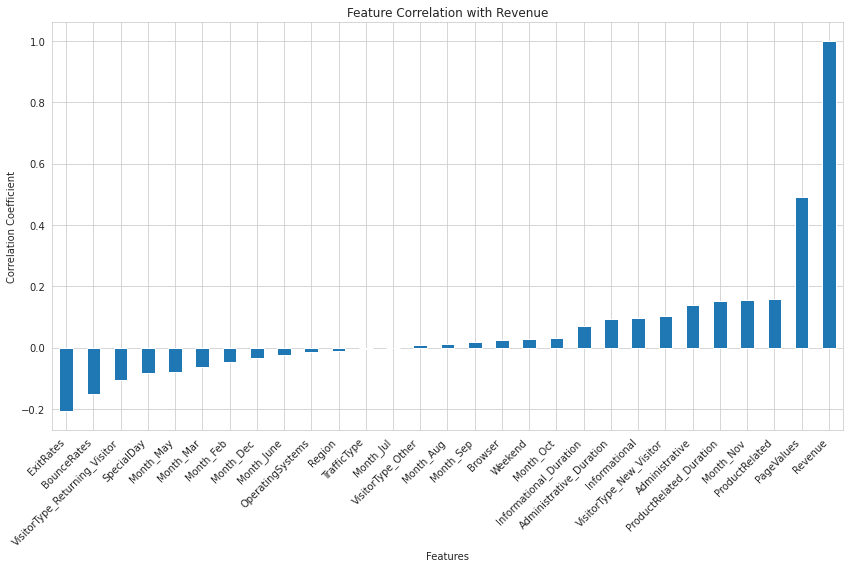

In [28]:
# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Extracting correlations specifically with 'Revenue'
correlation_with_revenue = correlation_matrix['Revenue'].sort_values()

# Plotting the correlations with 'Revenue'
plt.figure(figsize=(12, 8))

sns.set_style("whitegrid")
correlation_with_revenue.plot(kind='bar')
plt.title('Feature Correlation with Revenue')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()
plt.show()

This bar plot shows how several variables correlate with the Revenue target variable. 

Features such as `ExitRates` and `BounceRates` have *negative associations* with revenue. This implies that when these parameters increase, the likelihood of a transaction diminishes. It makes obvious sense, as greater exit and bounce rates often signal less interaction with the website, perhaps leading to fewer conversions.

Positive Correlations: On the other hand, `PageValues` has a significant positive association with Revenue. This means that when the page value, which is a measure of how valuable a page is in terms of conversion, rises, so does the possibility of a transaction. This could indicate that focusing on high-value sites is a good strategy for growing revenue.

Weak or No Correlation: Many attributes have extremely weak positive or negative correlations with revenue. When viewed individually, these factors may not have a significant impact on revenue prediction. However, they may still provide useful information when combined with other features in a prediction model.

### Creating a pair plot.
A pair plot (or scatterplot matrix) is useful for displaying all pairwise associations, as well as the distribution of each variable along its diagonal. This figure can be fairly complex, thus in accordance with Tufte's principles, we attempt for clarity by limiting the amount of variables included in the plot.

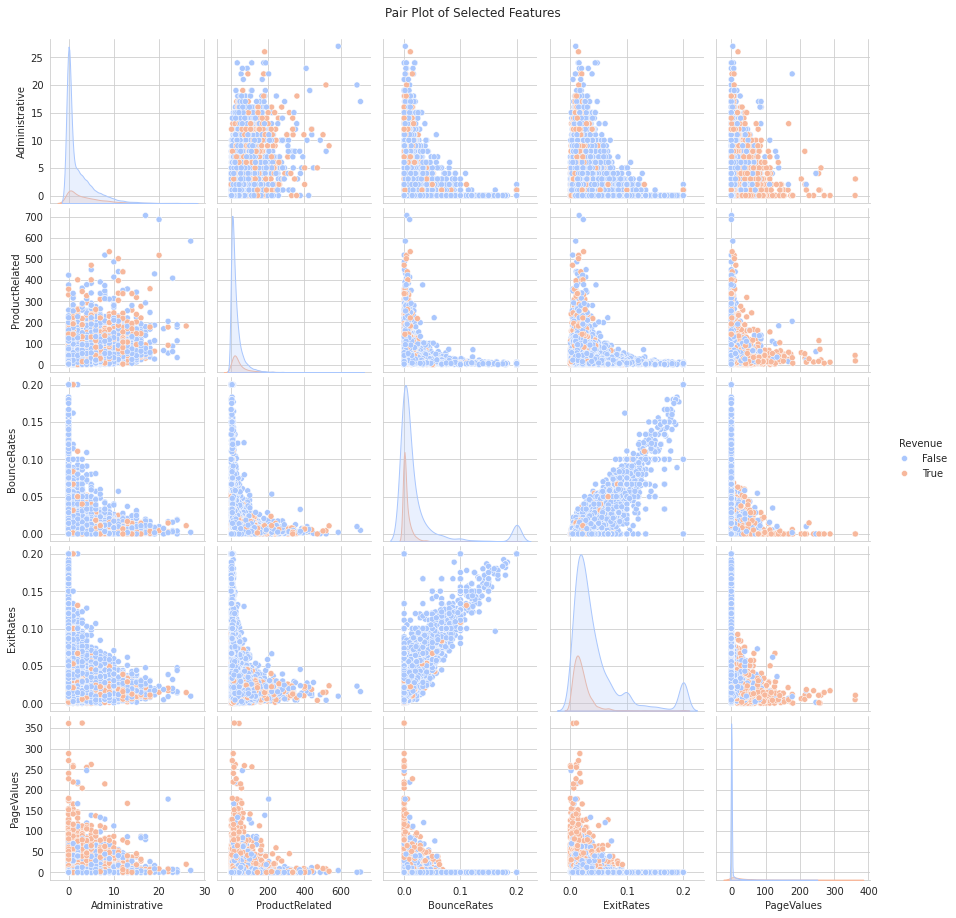

In [121]:
# Select a subset of numerical columns for clarity
columns_to_plot = ['Administrative', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues', 'Revenue']

# Create a pair plot
sns.pairplot(correlation_df[columns_to_plot], hue='Revenue', palette='coolwarm', diag_kind='kde')

plt.suptitle('Pair Plot of Selected Features', y=1.02)  
plt.show()

Correlations: Certain pairs of attributes exhibit an obvious correlation pattern. For example, "ProductRelated" and "ProductRelated_Duration" appear to have a positive association, which makes sense given that more time is likely to be spent on product-related pages the more there are of them.

Feature Distributions: Diagonal graphs show the distribution of specific features. For example, "BounceRates" and "ExitRates" are skewed to the left, implying that lower rates are more prevalent.

Influence on Revenue: By observing where the orange spots are concentrated, we may determine which feature values may influence revenue generation. For example, higher "PageValues" appear to be connected with records containing revenue.

Separability of Classes: If the orange and blue points are well separated in any of the plots, it shows that those qualities may be strong predictors for discriminating between revenue-generating records and those that do not. "PageValues" appears to be a powerful predictor, as there is a clear distinction between orange and blue points in its histogram and throughout its row and column in the matrix.

Outliers: In numerous charts, isolated points deviate significantly from the rest, indicating probable outliers that could be special situations or data recording errors.

Some insights:
Engagement: The data demonstrates a general pattern in which increasing engagement (measured by page views) correlates with a higher likelihood of income generation. Marketing methods that successfully engage users may result in greater sales.

`Bounce/Exit Rates`: There is a clear trend where transactions become less frequent as bounce and exit rates rise. This emphasises the value of a sticky and engaging web design that invites users to remain and investigate.

Outliers: There are engagement outliers with a large number of page visits. These situations may be worth exploring to determine whether they represent a distinct user category or are the consequence of data errors.

Non-Linear Patterns: Some charts suggest non-linear interactions that would be better portrayed using more complex models than basic correlations.

Additional Segmentation: Dividing the analysis by different visitor kinds or segmenting people based on behaviour may yield more sophisticated insights.

#### Read the dataset in the Notebook using PySpark
To perform the analysis, read the dataset from HDFS using PySpark.  

#### Verify PySpark installation

In [11]:
#pip show pyspark

In [30]:
import sys
print(sys.executable)

/usr/bin/python3


In [31]:
import pyspark
print(pyspark.__version__)

3.4.2


In [169]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Online Shoppers Intention Analysis") \
    .getOrCreate()

# Load the dataset from HDFS
shopperintents_df = spark.read.csv('hdfs://localhost:9000/user/hduser/data/online_shoppers_intention.csv', 
                                   header=True, inferSchema=True)
shopperintents_df.show(5, truncate=False)

+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+---------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+
|Administrative|Administrative_Duration|Informational|Informational_Duration|ProductRelated|ProductRelated_Duration|BounceRates|ExitRates|PageValues|SpecialDay|Month|OperatingSystems|Browser|Region|TrafficType|VisitorType      |Weekend|Revenue|
+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+---------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+
|0             |0.0                    |0            |0.0                   |1             |0.0                    |0.2        |0.2      |0.0       |0.0       |Feb  |1               |1      |1     |1          |Returning_Visitor|false  |false  |
|0             |0.0 

In [170]:
shopperintents_df.take(5)

[Row(Administrative=0, Administrative_Duration=0.0, Informational=0, Informational_Duration=0.0, ProductRelated=1, ProductRelated_Duration=0.0, BounceRates=0.2, ExitRates=0.2, PageValues=0.0, SpecialDay=0.0, Month='Feb', OperatingSystems=1, Browser=1, Region=1, TrafficType=1, VisitorType='Returning_Visitor', Weekend=False, Revenue=False),
 Row(Administrative=0, Administrative_Duration=0.0, Informational=0, Informational_Duration=0.0, ProductRelated=2, ProductRelated_Duration=64.0, BounceRates=0.0, ExitRates=0.1, PageValues=0.0, SpecialDay=0.0, Month='Feb', OperatingSystems=2, Browser=2, Region=1, TrafficType=2, VisitorType='Returning_Visitor', Weekend=False, Revenue=False),
 Row(Administrative=0, Administrative_Duration=0.0, Informational=0, Informational_Duration=0.0, ProductRelated=1, ProductRelated_Duration=0.0, BounceRates=0.2, ExitRates=0.2, PageValues=0.0, SpecialDay=0.0, Month='Feb', OperatingSystems=4, Browser=1, Region=9, TrafficType=3, VisitorType='Returning_Visitor', Weekend

In [34]:
type(shopperintents_df)

pyspark.sql.dataframe.DataFrame

In [35]:
shopperintents_df.count()

12330

In [36]:
shopperintents_df.printSchema()

root
 |-- Administrative: integer (nullable = true)
 |-- Administrative_Duration: double (nullable = true)
 |-- Informational: integer (nullable = true)
 |-- Informational_Duration: double (nullable = true)
 |-- ProductRelated: integer (nullable = true)
 |-- ProductRelated_Duration: double (nullable = true)
 |-- BounceRates: double (nullable = true)
 |-- ExitRates: double (nullable = true)
 |-- PageValues: double (nullable = true)
 |-- SpecialDay: double (nullable = true)
 |-- Month: string (nullable = true)
 |-- OperatingSystems: integer (nullable = true)
 |-- Browser: integer (nullable = true)
 |-- Region: integer (nullable = true)
 |-- TrafficType: integer (nullable = true)
 |-- VisitorType: string (nullable = true)
 |-- Weekend: boolean (nullable = true)
 |-- Revenue: boolean (nullable = true)



In [37]:
shopperintents_df.describe().show()

24/03/31 18:36:34 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+-----------------------+------------------+----------------------+------------------+-----------------------+--------------------+--------------------+-----------------+-------------------+-----+------------------+------------------+------------------+-----------------+-----------------+
|summary|    Administrative|Administrative_Duration|     Informational|Informational_Duration|    ProductRelated|ProductRelated_Duration|         BounceRates|           ExitRates|       PageValues|         SpecialDay|Month|  OperatingSystems|           Browser|            Region|      TrafficType|      VisitorType|
+-------+------------------+-----------------------+------------------+----------------------+------------------+-----------------------+--------------------+--------------------+-----------------+-------------------+-----+------------------+------------------+------------------+-----------------+-----------------+
|  count|             12330|                  123

In [38]:
total_rows = shopperintents_df.count()
print(f"Total rows: {total_rows}")

Total rows: 12330


#### Recheck the missing values

In [39]:
from pyspark.sql.functions import col

# Initialize a flag to track whether missing values are found
missing_values_found = False

for column in shopperintents_df.columns:
    missing_count = shopperintents_df.filter(col(column).isNull() | (col(column) == '')).count()
    if missing_count > 0:
        print(f"Column {column} has {missing_count} missing values")
        missing_values_found = True

# Check the flag after checking all columns, and print a message if no missing values were found
if not missing_values_found:
    print("No missing values found in any column.")

No missing values found in any column.


## Machine Learning

### Random Forest Classifier Model

### Data Preprocessing

#### Encoding the data

In [123]:
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline


# Correcting 'Weekend' column type to integer for processing
shopperintents_df = shopperintents_df.withColumn("Weekend", col("Weekend").cast("integer"))

# Convert 'Revenue' from boolean to integer (1 for True, 0 for False)
shopperintents_df = shopperintents_df.withColumn("Revenue", col("Revenue").cast("integer"))

# Index and encode categorical columns
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(shopperintents_df) for column in ["Month", "VisitorType"]]

encoder = OneHotEncoder(inputCols=[indexer.getOutputCol() for indexer in indexers], 
                        outputCols=[indexer.getOutputCol().replace("_index", "_vec") for indexer in indexers])

# Assemble all features into one vector column
assemblerInputs = [indexer.getOutputCol().replace("_index", "_vec") for indexer in indexers] + ['Weekend'] + [col for col in shopperintents_df.columns if col not in ["Month", "VisitorType", "Revenue", "Weekend"]]

assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

# Define the pipeline
pipeline = Pipeline(stages=indexers + [encoder, assembler])

# Fit and transform
pipelineModel = pipeline.fit(shopperintents_df)
df_transformed = pipelineModel.transform(shopperintents_df)

# Select the output and target variable
online_df = df_transformed.select("features", "Revenue")

#### Split the Dataset

In [124]:
train_data, test_data = online_df.randomSplit([0.8, 0.2], seed=42)

#### Define and Train the Random Forest Model

In [125]:
from pyspark.ml.classification import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(labelCol="Revenue", featuresCol="features", numTrees=10)

# Train the model
rf_model = rf_classifier.fit(train_data)

#### Evaluate the Model

In [126]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

predictions = rf_model.transform(test_data)

evaluator = BinaryClassificationEvaluator(labelCol="Revenue")
auc = evaluator.evaluate(predictions)

print(f"Area under ROC: {auc}")

Area under ROC: 0.905333427025509


#### Evaluation Metrics
Applying MulticlassClassificationEvaluator, precision, recall, and F1 score.

In [128]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Accuracy metric
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="Revenue", predictionCol="prediction", metricName="accuracy")

# Compute accuracy
accuracy = accuracy_evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

# Weighted Precision
precision_evaluator = MulticlassClassificationEvaluator(labelCol="Revenue", predictionCol="prediction", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(predictions)
print(f"Weighted Precision: {precision}")

# Weighted Recall
recall_evaluator = MulticlassClassificationEvaluator(labelCol="Revenue", predictionCol="prediction", metricName="weightedRecall")
recall = recall_evaluator.evaluate(predictions)
print(f"Weighted Recall: {recall}")

# F1 Score
f1_evaluator = MulticlassClassificationEvaluator(labelCol="Revenue", predictionCol="prediction", metricName="f1")
f1 = f1_evaluator.evaluate(predictions)
print(f"F1 Score: {f1}")

Accuracy: 0.8895781637717122
Weighted Precision: 0.8806423451339364
Weighted Recall: 0.8895781637717122
F1 Score: 0.8762561858340643


- Insight and Model Interpretation

Overall Performance: The model predicts online shopping session outcomes with high accuracy. The metrics indicate that it is accurate in its forecasts and capable of capturing a large share of prospective purchasing sessions.

The accuracy result of 0.8896 indicates that the model accurately predicts the outcome of an online shopping session (whether or not a purchase is made) approximately 88.96% of the time across all sessions in the test dataset.

Model Balance: A relatively balanced F1 Score implies that the model is well-calibrated, balancing precision and recall trade-offs. This balance is critical for maintaining performance across various parts of data.

Application Considerations: Depending on the unique application, one statistic may be prioritised above another. For example, if losing potential sales (false negatives) is extremely costly, it may prioritise recall. Conversely, if targeting users wrongly (false positives) could result in unpleasant user experiences or wasted resources, it may prioritise precision. However, the approach looks to provide a robust solution without requiring major compromise on either front.

Further Optimisation: Although the model performs well, there is always opportunity for improvement. This could include fine-tuning hyperparameters, experimenting with feature engineering to supply the model with more informative inputs, or evaluating other modelling approaches to see if they increase performance.

Class Imbalance Consideration: Weighted measures are very useful in datasets containing class imbalances. If the dataset contains far more non-purchasing than purchase sessions, these weighted metrics help guarantee that the model's performance is evaluated in a way that represents its efficacy across both categories.

#### Cross Validation and Hyperparameter Tuning  in PySpark
The CrossValidator in PySpark MLlib allows to perform cross-validation across multiple parameters and folds. Then needs to specify the model (or pipeline), parameter grid, and evaluation criteria.

#### Define the Random Forest Model, Parameter Grid, and Evaluator

In [129]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Random Forest classifier
rf = RandomForestClassifier(labelCol="Revenue", featuresCol="features")

# Parameter grid for tuning
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .build()

# Evaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Revenue", metricName="areaUnderROC")

# CrossValidator
cv = CrossValidator(estimator=rf,
                    estimatorParamMaps=paramGrid,
                    evaluator=evaluator,
                    numFolds=3)  # Adjust numFolds depending on the system's capabilities

# Run cross-validation
cvModel = cv.fit(train_data)

24/03/31 20:53:54 WARN DAGScheduler: Broadcasting large task binary with size 1098.2 KiB
24/03/31 20:54:04 WARN DAGScheduler: Broadcasting large task binary with size 1085.4 KiB
24/03/31 20:54:16 WARN DAGScheduler: Broadcasting large task binary with size 1076.2 KiB
24/03/31 20:54:21 WARN DAGScheduler: Broadcasting large task binary with size 1209.8 KiB


#### Evaluate the Best Model

In [130]:
bestModel = cvModel.bestModel
predictions = bestModel.transform(test_data)
auc = evaluator.evaluate(predictions)
print("Test Area Under ROC: ", auc)

Test Area Under ROC:  0.9275518873649753


AUC value of 0.9275 shows outstanding model performance, as it is closer to 1. The score of 0.9275 indicates that the model has a high degree of class separability and performs well at ranking predictions so that true positives are rated higher than genuine negatives.

## Neural Network

### Data Preprocessing

### Encoding Categorical Variables

In [132]:
from pyspark.ml.feature import StringIndexer

# Define the categorical columns to be encoded
categorical_columns = ["Month", "VisitorType"]

# Encode categorical variables into numerical values
indexers = [StringIndexer(inputCol=c, outputCol=c+"_index").fit(shopperintents_df) for c in categorical_columns]
for indexer in indexers:
    shopperintents_df = indexer.transform(shopperintents_df)

### Assembling Features

In [133]:
from pyspark.ml.feature import VectorAssembler

# As 'Weekend' is boolean, convert it to integer
shopperintents_df = shopperintents_df.withColumn("Weekend", col("Weekend").cast("integer"))

# Define the feature columns
feature_columns = ["Administrative", "Administrative_Duration", "Informational", 
                   "Informational_Duration", "ProductRelated", "ProductRelated_Duration", 
                   "BounceRates", "ExitRates", "PageValues", "SpecialDay", "OperatingSystems",
                   "Browser","Region", "TrafficType", "Month_index", "VisitorType_index", "Weekend"]

# Assemble feature columns into a single feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
shopperintents_df = assembler.transform(shopperintents_df)

In [134]:
# Show the resulting DataFrame with the new 'features' column
shopperintents_df.select("features").show(truncate=False)

+-----------------------------------------------------------------------------------------------+
|features                                                                                       |
+-----------------------------------------------------------------------------------------------+
|(17,[4,6,7,10,11,12,13,14],[1.0,0.2,0.2,1.0,1.0,1.0,1.0,9.0])                                  |
|(17,[4,5,7,10,11,12,13,14],[2.0,64.0,0.1,2.0,2.0,1.0,2.0,9.0])                                 |
|(17,[4,6,7,10,11,12,13,14],[1.0,0.2,0.2,4.0,1.0,9.0,3.0,9.0])                                  |
|(17,[4,5,6,7,10,11,12,13,14],[2.0,2.666666667,0.05,0.14,3.0,2.0,2.0,4.0,9.0])                  |
|(17,[4,5,6,7,10,11,12,13,14,16],[10.0,627.5,0.02,0.05,3.0,3.0,1.0,4.0,9.0,1.0])                |
|(17,[4,5,6,7,10,11,12,13,14],[19.0,154.2166667,0.015789474,0.024561404,2.0,2.0,1.0,3.0,9.0])   |
|(17,[4,6,7,9,10,11,12,13,14],[1.0,0.2,0.2,0.4,2.0,4.0,3.0,3.0,9.0])                            |
|(17,[0,6,7,10,11,12

### Scaling Features

In [135]:
from pyspark.ml.feature import StandardScaler

# Scale the feature vector
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scaler_model = scaler.fit(shopperintents_df)
shopperintents_df = scaler_model.transform(shopperintents_df)

### Convert 'Revenue' into Label Indices

In [136]:
from pyspark.sql.functions import col

# Convert BooleanType "Revenue" column into a string type
shopperintents_df = shopperintents_df.withColumn("Revenue", col("Revenue").cast("string"))

#Applying the StringIndexer
label_indexer = StringIndexer(inputCol="Revenue", outputCol="label")
shopperintents_df = label_indexer.fit(shopperintents_df).transform(shopperintents_df)

### Define Features and Label

In [137]:
# Assuming 'features' are the input features influencing revenue and 'Revenue' is the target variable
feature_columns = shopperintents_df.columns[:-1]  # All columns except the target variable
label_column = "Revenue"

### Train-Test Split

In [138]:
# Split the dataset into training and testing sets
train_data, test_data = shopperintents_df.randomSplit([0.7, 0.3], seed=42)

In [139]:
#Print the Schema
train_data.printSchema()

root
 |-- Administrative: integer (nullable = true)
 |-- Administrative_Duration: double (nullable = true)
 |-- Informational: integer (nullable = true)
 |-- Informational_Duration: double (nullable = true)
 |-- ProductRelated: integer (nullable = true)
 |-- ProductRelated_Duration: double (nullable = true)
 |-- BounceRates: double (nullable = true)
 |-- ExitRates: double (nullable = true)
 |-- PageValues: double (nullable = true)
 |-- SpecialDay: double (nullable = true)
 |-- Month: string (nullable = true)
 |-- OperatingSystems: integer (nullable = true)
 |-- Browser: integer (nullable = true)
 |-- Region: integer (nullable = true)
 |-- TrafficType: integer (nullable = true)
 |-- VisitorType: string (nullable = true)
 |-- Weekend: integer (nullable = true)
 |-- Revenue: string (nullable = true)
 |-- Month_index: double (nullable = false)
 |-- VisitorType_index: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- scaledFeatures: vector (nullable = true)
 |-- label: 

### Create Neural Network Model
Apply an Artificial Neural Network (ANN), also known as a Multilayer Perceptron (MLP).
Using Apache Spark's MLlib

In [48]:
#### Inspecting the Vector Size: 
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Define a UDF to calculate the vector size
size_udf = udf(lambda x: len(x), IntegerType())

# Apply the UDF to your DataFrame to create a new column with the vector size
train_data_with_size = train_data.withColumn("featureVectorSize", size_udf(train_data["scaledFeatures"]))

# Show the distinct sizes of feature vectors
train_data_with_size.select("featureVectorSize").distinct().show()


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


+-----------------+
|featureVectorSize|
+-----------------+
|               17|
+-----------------+



In [32]:
from pyspark.ml.classification import MultilayerPerceptronClassifier

# Ensure the input layer size matches the size of the 'scaledFeatures' vector
input_layer_size = 17  # Adjust based on actual number of scaled features
output_layer_size = 2  # Assuming binary classification, adjust if necessary

# Define the layers of the neural network
layers = [input_layer_size, 5, 4, output_layer_size]

# Initialize the classifier with 'scaledFeatures'
nn_classifier = MultilayerPerceptronClassifier(featuresCol="scaledFeatures", labelCol="label", layers=layers, blockSize=128, seed=42)

# Train the model on the training data
model = nn_classifier.fit(train_data)

### Model Evaluation

In [33]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Predict on the test data
predictions = model.transform(test_data)

# Initialize the evaluator for accuracy metric
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Compute accuracy on the test set
accuracy = evaluator.evaluate(predictions)
print(f"Test set accuracy = {accuracy}")

Test set accuracy = 0.897364771151179


In [34]:
recall_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="recallByLabel")
recall = recall_evaluator.evaluate(predictions)
print(f"Recall: {recall}")

precision_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="precisionByLabel")
precision = precision_evaluator.evaluate(predictions)
print(f"Precision: {precision}")

f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions)
print(f"F1 Score: {f1_score}")

Recall: 0.9644736842105263
Precision: 0.9179711959924859
F1 Score: 0.8905352359734012


In [35]:
# BinaryClassificationEvaluator is used for calculating the Area Under ROC
from pyspark.ml.evaluation import BinaryClassificationEvaluator

roc_evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction", metricName="areaUnderROC")
roc_auc = roc_evaluator.evaluate(predictions)
print(f"Area Under ROC: {roc_auc}")

Area Under ROC: 0.7503784350256172


###  Interpretation and Insights

#### Analyze the results and draw insights regarding the key features influencing e-commerce revenue generation for different visitor types.

The model performs quite well in terms of accuracy, precision, recall, and F1 score, demonstrating that it is competent at identifying the positive class while striking an appropriate balance between precision and recall. However, while the AUC-ROC score is reasonable, it indicates that the model's ability to differentiate between classes across all thresholds may be improved. This could entail further feature engineering, testing multiple models, or adjusting hyperparameters. 

Perspectives on Key Features
Given the model's success, we can conclude that the variables it employs are generally useful in predicting e-commerce revenue creation. To gain particular insights into which features are the most influential:

Feature Importance: Because of the "black box" nature of neural network models such as MultilayerPerceptronClassifier, it is difficult to directly understand feature importance. However, visitor behavior-related metrics (such as PageValues, BounceRates, ExitRates, and time spent on various sorts of pages) are likely to play an important role. High page values and extended engagement (longer durations) may be strong markers of prospective revenue production.

Visitor categories: The inclusion and noticeable influence of VisitorType_index in the model imply that different categories of visitors (e.g., new vs. returning, or different segmentation based on visitor behaviour) demonstrate varied patterns of revenue production. For example, returning visitors may be more likely to contribute to income than first-time visitors, highlighting the need of customer retention initiatives.

Seasonality and Special Days: The model's usage of Month_index and SpecialDay suggests that seasonality and special periods (such as holidays and sales events) influence purchasing behaviour. Tailoring marketing efforts to these times could be especially beneficial.

(Recommendations for Ecommerce Strategy
Focus on High-Value Visitor Engagement. Enhance engagement strategies for high-value visitor segments, such as personalised content, targeted offers, or loyalty programmes.

Optimise for Key Conversion Indicators: Prioritise website optimisations that improve the user experience in areas that are most likely to generate revenue (for example, lowering bounce rates and increasing value on key pages).

Leverage Seasonality: Create focused marketing campaigns around periods of increased purchasing desire, as shown by the model's sensitivity to Month_index and SpecialDay.

Continuous Model Improvement: Based on the AUC-ROC score, continue to refine the model by exploring new features, correcting any data imbalances, and experimenting with different modelling techniques to improve the ability to distinguish between revenue-generating and non-revenue-generating visits.)

## PyTorch

### Preprocessing Data with PySpark and PyTorch

In [171]:
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# Define numerical, categorical, and boolean columns
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
                  'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','OperatingSystems',
                  'Browser','Region','TrafficType']
categorical_cols = ['Month', 'VisitorType']  # Categorical features
boolean_col = 'Weekend'  # Boolean feature

# Convert boolean column to numeric (0 or 1)
shopperintents_df = shopperintents_df.withColumn(boolean_col, shopperintents_df[boolean_col].cast('integer'))

In [172]:
# Pipeline stages
stages = []

# Index and encode categorical columns
for categoricalCol in categorical_cols:
    indexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    encoder = OneHotEncoder(inputCols=[indexer.getOutputCol()], outputCols=[categoricalCol + "Vec"])
    stages += [indexer, encoder]

# Assemble all features into a single vector (including boolean as numeric)
assemblerInputs = [c + "Vec" for c in categorical_cols] + numerical_cols + [boolean_col]
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

# StandardScaler for scaling features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

stages += [assembler, scaler]

# Define and apply the pipeline
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(shopperintents_df)
df_transformed = pipelineModel.transform(shopperintents_df)

# Select the scaled features and the label for model training
new_df = df_transformed.select("scaledFeatures", "Revenue")

#### Convert Spark DataFrame to Pandas DataFrame
After running the PySpark pipeline and picking scaled features and labels, the data is nearly ready for PyTorch. However, PyTorch requires data in the form of tensors, thus the Spark DataFrame must be converted to a format that allows these tensors to be easily created.

In [173]:
import pandas as pd

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = new_df.toPandas()
pandas_df.head()

scaledFeatures  Revenue
0  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    False
1  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    False
2  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    False
3  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    False
4  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    False

#### Convert Data to PyTorch Tensors

In [174]:
import numpy as np
import torch

# As 'scaledFeatures' are stored in a Dense Vector format, convert them to arrays
X = np.array(pandas_df['scaledFeatures'].tolist())
y = pandas_df['Revenue'].astype(np.float32).values.reshape(-1, 1)  # Reshape for consistency

# Convert arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

#### Split the Data into Training and Testing Sets

In [145]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Determining the Number of Input Features: 
input_features = X_tensor.shape[1]

#### Create DataLoaders for Training and Testing

In [146]:
from torch.utils.data import TensorDataset, DataLoader

# Create TensorDatasets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [175]:
print("Shape of input features:", X_train_tensor.shape)

Shape of input features: torch.Size([9864, 26])


In [176]:
print("Shape of labels:", y_train_tensor.shape)

Shape of labels: torch.Size([9864, 1])


## Neural Network Model in PyTorch
Create a basic neural network for binary classification. Adjusting the number of input features (input_features) to correspond to the number of features in the dataset.

### Building the SimpleNN model
First, use PyTorch to build a simple neural network for a binary classification problem. The SimpleNN neural network design is a simple example ideal for binary classification tasks, with a foundation that may be extended or adjusted to meet individual task needs or performance targets. It demonstrates how to build, train, and evaluate a neural network using PyTorch, beginning with preprocessed data.

In [45]:
from torch import nn

class SimpleNN(nn.Module):
    def __init__(self, input_features):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_features, 64)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

model = SimpleNN(input_features=X_train.shape[1])

### Training the Model.
Define the loss function and optimizer, then set up the training loop.

In [46]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/10, Loss: 0.35755544900894165
Epoch 2/10, Loss: 0.2934904098510742
Epoch 3/10, Loss: 0.41510146856307983
Epoch 4/10, Loss: 0.016603315249085426
Epoch 5/10, Loss: 0.15555065870285034
Epoch 6/10, Loss: 0.33644306659698486
Epoch 7/10, Loss: 0.13129207491874695
Epoch 8/10, Loss: 0.2523808181285858
Epoch 9/10, Loss: 0.05157117545604706
Epoch 10/10, Loss: 0.4970818758010864


### Evaluate the Model
Evaluate the model's performance on the test data.

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# First, collect all predictions and true labels to compute the metrics
y_pred_list = []
y_true_list = []

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        predicted = outputs.round().detach().numpy()  # Convert predictions to NumPy array
        y_pred_list.extend(predicted.flatten())  # Flatten to ensure it's a 1D list
        y_true_list.extend(y_batch.numpy().flatten())  # Same for true labels

# Calculate the metrics
y_pred_arr = np.array(y_pred_list)
y_true_arr = np.array(y_true_list)

accuracy = accuracy_score(y_true_arr, y_pred_arr)
precision = precision_score(y_true_arr, y_pred_arr, zero_division=0)  # Avoid division by zero
recall = recall_score(y_true_arr, y_pred_arr)
f1 = f1_score(y_true_arr, y_pred_arr)

print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

Accuracy: 0.8913, Precision: 0.7214, Recall: 0.5669, F1 Score: 0.6349


While high accuracy is generally desirable, it may not provide a whole picture, particularly in imbalanced datasets. If one class outnumbers the other, a model can attain high accuracy by always forecasting the majority class. This is why it's critical to evaluate other indicators as well.

This Precision shows that the model is reasonably accurate when predicting whether a visitor would earn revenue. However, approximately 28% of visitors expected to earn revenue do not do so. These projections may have an impact on resource allocation or marketing strategy.

The Recall approach overlooks a sizable percentage of visitors (about 43%) that do result in income. If interventions or optimisations are made only on the basis of model forecasts, this could result in missed opportunities.

The F1 score offers a single metric to evaluate the harmony between precision and recall: the harmonic mean of the two. An F1 score of 63.49% indicates a moderate recall and precision ratio.
The F1 score, while neither exceptionally high nor low, suggests that there is potential for improvement, particularly in terms of optimising recall without appreciably compromising precision. 

### CNN Model for Binary Classification

In [214]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [216]:
# Create DataLoader objects for training and testing datasets
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor.view(-1, 1))
test_dataset = TensorDataset(X_test_tensor, y_test_tensor.view(-1, 1))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [217]:
print("Shape of input features:", X_train_tensor.shape)

Shape of input features: torch.Size([9864, 26])


In [218]:
print("Shape of labels:", y_train_tensor.shape)

Shape of labels: torch.Size([9864, 1])


In [219]:
# Define the CNN model
class CNN1DModel(nn.Module):
    def __init__(self, input_features):
        super(CNN1DModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_features, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(3200, 128)  # Adjusted based on the flattened size
        self.fc2 = nn.Linear(128, 1)  # Assuming binary classification (1 output unit)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)  # Flatten the tensors for the fully connected layer
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

#### Loss Function and Optimizer

# Binary classification with a single output unit
criterion = nn.BCELoss()

# Determining the Number of Input Features
input_features = X_tensor.shape[1]

# Create an instance of the CNN1DModel
model = CNN1DModel(input_features=26)  # Assuming input_features is 26

# Optimizer (can be experimented with different optimizers and learning rates)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [220]:
# Create an instance of the CNN1DModel
model = CNN1DModel(input_features=X_train.shape[1])  # Assuming input_features is the number of features

# Set the model to training mode
model.train()

# Define your loss function
criterion = nn.BCELoss()

# Define your optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#### Training Loop

In [221]:
# Training loop
num_epochs = 25
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        # Reshape inputs to match expected input shape (batch_size, num_features, 1)
        inputs = inputs.unsqueeze(2)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

RuntimeError: max_pool1d() Invalid computed output size: 0

#### Evaluation the Model

In [222]:
# Set the model to evaluation mode
CNN1DModel.eval()

# Disable gradient calculation for evaluation to save memory and computations
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = CNN1DModel(inputs)
        predicted = (outputs.data > 0.5).float()  # Using 0.5 as the threshold for binary classification
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy of the model on the test data: {accuracy:.4f}')

TypeError: Module.eval() missing 1 required positional argument: 'self'

In [204]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print('Test Accuracy: {:.4f}'.format(accuracy))

RuntimeError: Given groups=1, weight of size [64, 26, 3], expected input[1, 64, 26] to have 26 channels, but got 64 channels instead

### Building the ANN Model

In [37]:
import torch
from torch import nn

class ANNModel(nn.Module):
    def __init__(self, input_features):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_features, 128)  # First hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)  # Second hidden layer
        self.output = nn.Linear(64, 1)  # Output layer
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.output(x))
        return x

#### Define the Neural Network Model: 

In [39]:
# Th input_features is the number of features in the dataset
model = ANNModel(input_features=X_train.shape[1])

#### Compile the model.
To compile the model, choose an optimizer and a loss function. Because it is a binary classification problem, the binary cross-entropy loss may be a suitable alternative.

In [40]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

#### Train the model.
Implement the training loop, which involves feeding input features into the model to generate predictions, calculating the loss, and updating the model parameters.

In [41]:
num_epochs = 10  # Set the number of epochs

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.7541
Epoch [2/10], Loss: 0.7111
Epoch [3/10], Loss: 0.6720
Epoch [4/10], Loss: 0.6367
Epoch [5/10], Loss: 0.6048
Epoch [6/10], Loss: 0.5762
Epoch [7/10], Loss: 0.5507
Epoch [8/10], Loss: 0.5281
Epoch [9/10], Loss: 0.5083
Epoch [10/10], Loss: 0.4913


### Evaluate the Model

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_pred = model(X_test).round()  # Obtain predictions and round them to 0 or 1

# Convert predictions and true labels to NumPy arrays for evaluation with sklearn
y_pred_np = y_pred.numpy()
y_test_np = y_test.numpy()

In [43]:
# Calculate metrics
accuracy = accuracy_score(y_test_np, y_pred_np)
precision = precision_score(y_test_np, y_pred_np)
recall = recall_score(y_test_np, y_pred_np)
f1 = f1_score(y_test_np, y_pred_np)

print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

Accuracy: 0.8333, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000


/home/hduser/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- About the results:

Accuracy: A score of 0.8333 indicates that the model accurately predicted the outcome (True or False for the "Revenue" variable) approximately 83.33% of the time. While this may appear to be a good thing at first look, the other measures add important context and create a more complete picture.

Precision, recall, and F1 Score are all 0.0000, indicating that your model did not properly forecast any positive situations (this is true for "Revenue"). Precision and recall of 0 indicate that either the model predicted all instances as the negative class (False for "Revenue") or there were no positive cases in the test set (which is unlikely given the accuracy score). The F1 score, which balances precision and recall, is also zero, indicating that the model is unable to properly forecast positive cases.

Possible Issue: Class Imbalance: The provided metrics indicate a dataset with more negative instances (False for "Revenue") than positive ones (True). In such scenarios, a model may learn to predict the majority class for most or all instances, resulting in high accuracy but poor precision and recall for the minority class.
Model's Predictive Power: The ill-defined precision warning suggests that your model did not correctly forecast any positive cases. This could be because the model is unable to learn discriminative patterns for the positive class or because it is too biassed towards predicting the negative class, possibly due to class imbalance.

### Building Multi-Layer Perceptron or MLP with PyTorch

Given the complexities of e-commerce visitor interactions, a deep feedforward neural network (also known as a Multi-Layer Perceptron or MLP) can be quite useful. This network can capture nonlinear interactions between features thanks to its numerous layers and nonlinear activation functions.

In [51]:
import torch
from torch import nn

class VisitorNN(nn.Module):
    def __init__(self, num_features):
        super(VisitorNN, self).__init__()
        self.layer1 = nn.Linear(num_features, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)  # Helps prevent overfitting
        self.layer2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.output_layer = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()  # Suitable for binary classification
    
    def forward(self, x):
        x = self.dropout1(self.relu1(self.layer1(x)))
        x = self.dropout2(self.relu2(self.layer2(x)))
        x = self.sigmoid(self.output_layer(x))
        return x

#### Instantiate the model, define the loss function and the optimizer.
Before training the model, you must instantiate it and define the loss function and optimizer. Assuming a binary classification task (for example, predicting whether or not a visitor generates income), Binary Cross-Entropy can be used as the loss function.

In [ ]:
num_features = X_train.shape[1]
model = VisitorNN(num_features)

criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

#### Train the Model
This training procedure entails feeding batches of data into the model, calculating the loss, and changing the model parameters (weights and biases) via backpropagation.

In [52]:
num_epochs = 20  # The number of times to iterate over the entire dataset

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for X_batch, y_batch in train_loader:  # Assuming you have a DataLoader 'train_loader'
        optimizer.zero_grad()  # Clear gradients for the next train
        outputs = model(X_batch)  # Forward pass: compute the output
        loss = criterion(outputs, y_batch)  # Compute the loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Update model parameters
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

Epoch 1/20, Loss: 0.5609
Epoch 2/20, Loss: 0.1157
Epoch 3/20, Loss: 0.0237
Epoch 4/20, Loss: 0.2800
Epoch 5/20, Loss: 0.1622
Epoch 6/20, Loss: 0.2287
Epoch 7/20, Loss: 0.6322
Epoch 8/20, Loss: 0.0514
Epoch 9/20, Loss: 0.1166
Epoch 10/20, Loss: 0.6180
Epoch 11/20, Loss: 0.2359
Epoch 12/20, Loss: 0.0178
Epoch 13/20, Loss: 0.2200
Epoch 14/20, Loss: 0.5442
Epoch 15/20, Loss: 0.1237
Epoch 16/20, Loss: 0.0856
Epoch 17/20, Loss: 0.0554
Epoch 18/20, Loss: 0.2771
Epoch 19/20, Loss: 0.0223
Epoch 20/20, Loss: 0.1202


#### Evaluate the Model
Once the model has been trained, use the test set to evaluate its performance.

In [53]:
model.eval()  # Set the model to evaluation mode
y_pred_list = []

with torch.no_grad():  # Inference mode, gradients not needed
    for X_batch, _ in test_loader:  # Assuming you have a DataLoader 'test_loader'
        y_test_pred = model(X_batch)
        y_pred_tag = torch.round(y_test_pred)  # Convert probabilities to binary predictions
        y_pred_list.append(y_pred_tag.cpu().numpy())  # Assuming you're using a GPU

# Flatten the list and compare predictions with true labels to calculate accuracy
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [56]:
# Preparing True Labels and Predictions
import numpy as np

y_test_np = y_test.numpy()

# flat list or array
y_pred_np = np.array([item for sublist in y_pred_list for item in sublist])

#  Calculate Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test_np, y_pred_np)
precision = precision_score(y_test_np, y_pred_np)
recall = recall_score(y_test_np, y_pred_np)
f1 = f1_score(y_test_np, y_pred_np)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8917
Precision: 0.7667
Recall: 0.5036
F1 Score: 0.6079


- Overall Results:

The neural network model's performance metrics show that it is quite effective at predicting outcomes, with an overall accuracy of 89.17%, meaning that it correctly detects the majority of situations. However, the model performs better in ensuring that its positive predictions are accurate (precision of 76.67%) than in catching all probable positive cases (recall of 50.36%), as indicated by the lower recall rate. This implies that, while the model is cautious and reliable in predicting positive outcomes, it fails to detect a large proportion of actual positive cases, missing nearly half of them. 

The F1 score of 60.79% demonstrates a modest balance between precision and recall, indicating a trade-off that suggests space for development, notably in raising the model's sensitivity to positive examples without inadvertently increasing false positives. These findings indicate that, while the model performs well in general, attempts to improve recollection may result in a more balanced and successful model, particularly in applications where detecting as many positive cases as possible is critical.

Finally, the results show a robust model with particular strengths in accuracy and precision, but there are still areas for development, particularly in enhancing recall to catch more true positive cases. Balancing these metrics based on your application's specific requirements will be critical for further refining the model.

## Unable to run on this VM

## TensorFlow and Keras
Before putting data into a TensorFlow/Keras neural network model, ensure that it is in the correct format, which is typically NumPy arrays or TensorFlow datasets. Since dealing with Spark, converting a Spark DataFrame to a Pandas DataFrame and finally to NumPy arrays is critical.

### Convert PySpark DataFrame into TensorFlow Dataset
After preprocessing, we'll convert the PySpark DataFrame to a TensorFlow-compatible format. The simplest approach is to convert it to a Pandas DataFrame, then to TensorFlow's Dataset format.

In [1]:
#pip install --upgrade pyspark

In [2]:
#pip install scikit-learn

In [45]:
# Manually convert Spark DataFrame to Pandas DataFrame
import pandas as pd
import numpy as np

collected_data = new_df.collect()

pandas_df = pd.DataFrame(collected_data, columns=new_df.columns)

# Proceed to convert 'scaledFeatures' from vector to array and prepare for TensorFlow
X = np.array(pandas_df["scaledFeatures"].apply(lambda x: x.toArray()).tolist())
y = pandas_df["Revenue"].astype('int')

### Split the data

In [46]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
#pip install tensorflow

In [ ]:
# Create TensorFlow datasets
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

### Build and Train TensorFlow Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Since 'Revenue' is a binary classification task
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_dataset, epochs=10, validation_data=test_dataset)

### Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

### Data Preprocessing with PySpark
A PySpark Pipeline does more than just make code cleaner and more concise; it also ensures the consistency, dependability, and validity of data pretreatment and model application processes. It condenses the entire preprocessing and model training process into a consistent, reproducible, and manageable set of processes. It ensures that the same preprocessing steps, such as feature scaling and encoding, are applied to both training and future incoming data, preserving the model's predictions. This encapsulation eliminates data leaking during the transformation steps, a typical flaw in which information from the training dataset can inadvertently influence the model training process, resulting in unduly optimistic performance predictions. Pipelines also provide experimentation with various preprocessing procedures and model hyperparameters, speeding the model selection and validation process. 

Pipelines, which automate and structure the workflow, lower the risk of human mistake, increase code readability, and save critical development time, making them an indispensable tool in the data scientist's toolkit, particularly in the distributed computing setting provided by PySpark.